## Project 2: Analysis of Energy Effciencies of Different Building Types
##### By Delice Mambi-Lambu

##### Abstract & Introduction
This project is about the analysis of energy efficiencies of diffrent building types. We assess the heating load and cooling load requirements. These parameters are what we deem to be a mesurement of energy efficiency and we use them as a function of building parameters. 

The dataset consists of 8 features and 768 instances. In this dataset 12 diffrent building shape types are simulated via Ecotect (as per source given after). With these twelve shapes we produce an instance by varying diffent aspects of the building such as the glazing area, the glazing area distribution , the orientation and so on and so forth. The goal is to use Regression and Classification Algorithms to understand the relationships between the features and the response varibles.
 
##### The Features - X

* X1	Relative Compactness
* X2	Surface Area
* X3	Wall Area
* X4	Roof Area
* X5	Overall Height
* X6	Orientation
* X7	Glazing Area
* X8	Glazing Area Distribution

##### The Targets - y

* y1	Heating Load
* y2	Cooling Load



##### Citation
Tsanas,Athanasios and Xifara,Angeliki. (2012). Energy efficiency. UCI Machine Learning Repository. https://doi.org/10.24432/C51307.

#### Importing Libaries 

In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
from scipy import stats 
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn as sk

I want the plotting style to be in the form of ggplot. so lets change it.

In [2]:
mpl.style.use('ggplot')

#### Data Importing

In [3]:
# Here we obtain the path of our data file
from pathlib import Path
print(Path.cwd())

C:\Users\delic\OneDrive\Documents\Data Science Projects\Classfication


In [4]:
#importing data

path = r"C:\Users\delic\OneDrive\Documents\Data Science Projects\Classfication\ENB2012_data1.csv"

df = pd.read_csv(path)

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


In [5]:
# Check if we need to chancge columns 
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

#### Data Cleaning 

In [6]:
#Further Checks Do we need to do anything
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    float64
 6   X7      768 non-null    float64
 7   X8      768 non-null    float64
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(10)
memory usage: 101.4 KB


In [7]:
missingData = df.isnull()

In [8]:
for col in missingData.columns.values.tolist():
    print(col)
    print(missingData[col].value_counts())
    print("")

X1
X1
False    768
True     528
Name: count, dtype: int64

X2
X2
False    768
True     528
Name: count, dtype: int64

X3
X3
False    768
True     528
Name: count, dtype: int64

X4
X4
False    768
True     528
Name: count, dtype: int64

X5
X5
False    768
True     528
Name: count, dtype: int64

X6
X6
False    768
True     528
Name: count, dtype: int64

X7
X7
False    768
True     528
Name: count, dtype: int64

X8
X8
False    768
True     528
Name: count, dtype: int64

Y1
Y1
False    768
True     528
Name: count, dtype: int64

Y2
Y2
False    768
True     528
Name: count, dtype: int64



We see that theres actually more data than inteded lets get rid of this as this is no use to us. We also would like to use the dataframe in R hence we will export it afterwards.

In [9]:
df.dropna(axis = 0 , inplace = True) 
print(df.head())
df.isnull().sum()

     X1     X2     X3      X4   X5   X6   X7   X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0  2.0  0.0  0.0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0  3.0  0.0  0.0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0  4.0  0.0  0.0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0  5.0  0.0  0.0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0  2.0  0.0  0.0  20.84  28.28


X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [10]:
#Look at the types for each feature and taeget
df.dtypes

X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6    float64
X7    float64
X8    float64
Y1    float64
Y2    float64
dtype: object

In [11]:
# Lets export 
path = r"C:\Users\delic\OneDrive\Documents\Data Science Projects\Classfication\ENB2012_data2.csv"
df.to_csv(path, index = False)

##### Data Formatting 
We may look to do multi-classification problem. So lets create a new dataframe for this problem round the response varables to seek if we can classify them. 

In [12]:
#dataframe for classification - we will not normalise this. 
dfC = df.copy()
resList = list(dfC.columns)[-2:]
print(resList)
for res in resList:
    dfC[res] = round(dfC[res]) # note that we use bankers rounding for python 3.x 
    dfC[res] = dfC[res].astype('int')
print(dfC.dtypes)
dfC.head()

['Y1', 'Y2']
X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6    float64
X7    float64
X8    float64
Y1      int32
Y2      int32
dtype: object


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,16,21
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,16,21
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,16,21
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,16,21
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,21,28


It looks like all our data is clean and all of our data contains entries that are not null. Therefore we can focus Explotory Data Analysis 

#### Exploratory Data Analysis 

In [13]:
# Lets Try tp understand our data more 
print(df.head())
df.describe()

     X1     X2     X3      X4   X5   X6   X7   X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0  2.0  0.0  0.0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0  3.0  0.0  0.0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0  4.0  0.0  0.0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0  5.0  0.0  0.0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0  2.0  0.0  0.0  20.84  28.28


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


So, what can we gather from this data - we that features X2 Surface Area, X3 Wall Area , X4 Roof Area has the largest spread (standard deviation). To ensure that we have an accurate statistical model. We must normalise the features to do so. We want to establish the fact that a building with smaller value parameters will have an higher energy efficency. We define energy efficiency  as the lower the heating load and cooling load - the better the energy efficiency . Lets see if there is a correlation between the features and the targets.

In [14]:
X = list(df.columns)[:-2]
Y = list(df.columns)[-2:]
print(X, Y)
for i in Y: 
    for j in X:
        pearsonCoef, pValue = stats.pearsonr(df[j], df[i])
        answer1 = (pValue <= 1/1000)
        answer2 = (pearsonCoef <= 0.5) or (pearsonCoef <= -0.5)
        print(j, i, pearsonCoef, pValue, answer1, answer2) 

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'] ['Y1', 'Y2']
X1 Y1 0.6222721790646626 1.5912736997124078e-83 True False
X2 Y1 -0.6581202267776216 1.6869072902148853e-96 True True
X3 Y1 0.4556711568983096 1.2218886883327138e-40 True True
X4 Y1 -0.8618282529058219 4.914880966405315e-228 True True
X5 Y1 0.8894306741007043 1.1409232650145028e-262 True False
X6 Y1 -0.0025865339156387925 0.9429492916266334 False True
X7 Y1 0.2698409963206335 2.795962177593747e-14 True True
X8 Y1 0.08736759370846414 0.015440000762167156 False True
X1 Y2 0.6343390663353593 1.0608759912587051e-87 True False
X2 Y2 -0.6729989333544866 2.005212321080104e-102 True True
X3 Y2 0.4271169976671334 2.1081966043426875e-35 True True
X4 Y2 -0.862546603524974 7.732002122019067e-229 True True
X5 Y2 0.8957851688924501 5.85577061301801e-272 True False
X6 Y2 0.014289597576170227 0.6925623867167326 False True
X7 Y2 0.20750499116036222 6.456865072124254e-09 True True
X8 Y2 0.05052511880567566 0.16187117468132903 False True


After evauating the pearson coefficent and their pValues. We find that for Y1 5 features have a strong pearson coeffiecent (i.e.more than 0.5 and less than -0.5) and 6 features meet the requirement that the pValue is below 1/1000 . For Y2 6 features have a strong pearson coefficent and 6 meet the pValue requirement. We highlight the features that our consistent across the board -  fEATURES X2 Surface Area, X3 Wall Area and X4 Roof Area all have strong pearson coefficents and pValues that meet the requirement for both Y1 and Y2. Hence we can look to study these relationships in relation to Y1 and Y2. However, we do find that the other features either have weak pearson coeffients or pValues that dont meet the requirement. This indicates that the impact of these features are minimal by themselves but can have more influnce in combination with other features.

#### Data Normalisation

We now look to normalise our data.

In [15]:
cols = list(df.columns) 

for col in cols:
    df[col] = (df[col] - df[col].mean())/df[col].std()
    
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,2.040447,-1.784712,-0.561586,-1.469119,0.999349,-1.340767,-1.7593,-1.813393,-0.669680,-0.342443
1,2.040447,-1.784712,-0.561586,-1.469119,0.999349,-0.446922,-1.7593,-1.813393,-0.669680,-0.342443
2,2.040447,-1.784712,-0.561586,-1.469119,0.999349,0.446922,-1.7593,-1.813393,-0.669680,-0.342443
3,2.040447,-1.784712,-0.561586,-1.469119,0.999349,1.340767,-1.7593,-1.813393,-0.669680,-0.342443
4,1.284142,-1.228438,0.000000,-1.197897,0.999349,-1.340767,-1.7593,-1.813393,-0.145409,0.388113


#### Data Visualisation

Lets explore the relationships between each feature and the Target.
We will focus on the following features due to to its strong pearson coeficent and meeting the pValue requirement. 
* X2 Surface Area
* X3 Wall Area
* X4 Roof Area


In [16]:
# Establish relationships between Xn and Yn 

# X2 
X2 = df['X2']
Y1 = df['Y1'] 
fit21 = np.polyfit(X2, Y1, 1) 

X2 = df['X2']
Y2 = df['Y2']
fit22 = np.polyfit(X2, Y2, 1) 

# X3
X3 = df['X3']
Y1 = df['Y1']
fit31 = np.polyfit(X3, Y1, 1) 

X3 = df['X3']
Y2 = df['Y2']
fit32 = np.polyfit(X3, Y2, 1) 

#X4
X4 = df['X4']
Y1 = df['Y1']
fit41 = np.polyfit(X4, Y1, 1) 

X4 = df['X4']
Y2 = df['Y2']
fit42 = np.polyfit(X4, Y2, 1) 

Now we plot ...

Text(0.5, 23.52222222222222, 'Roof Area')

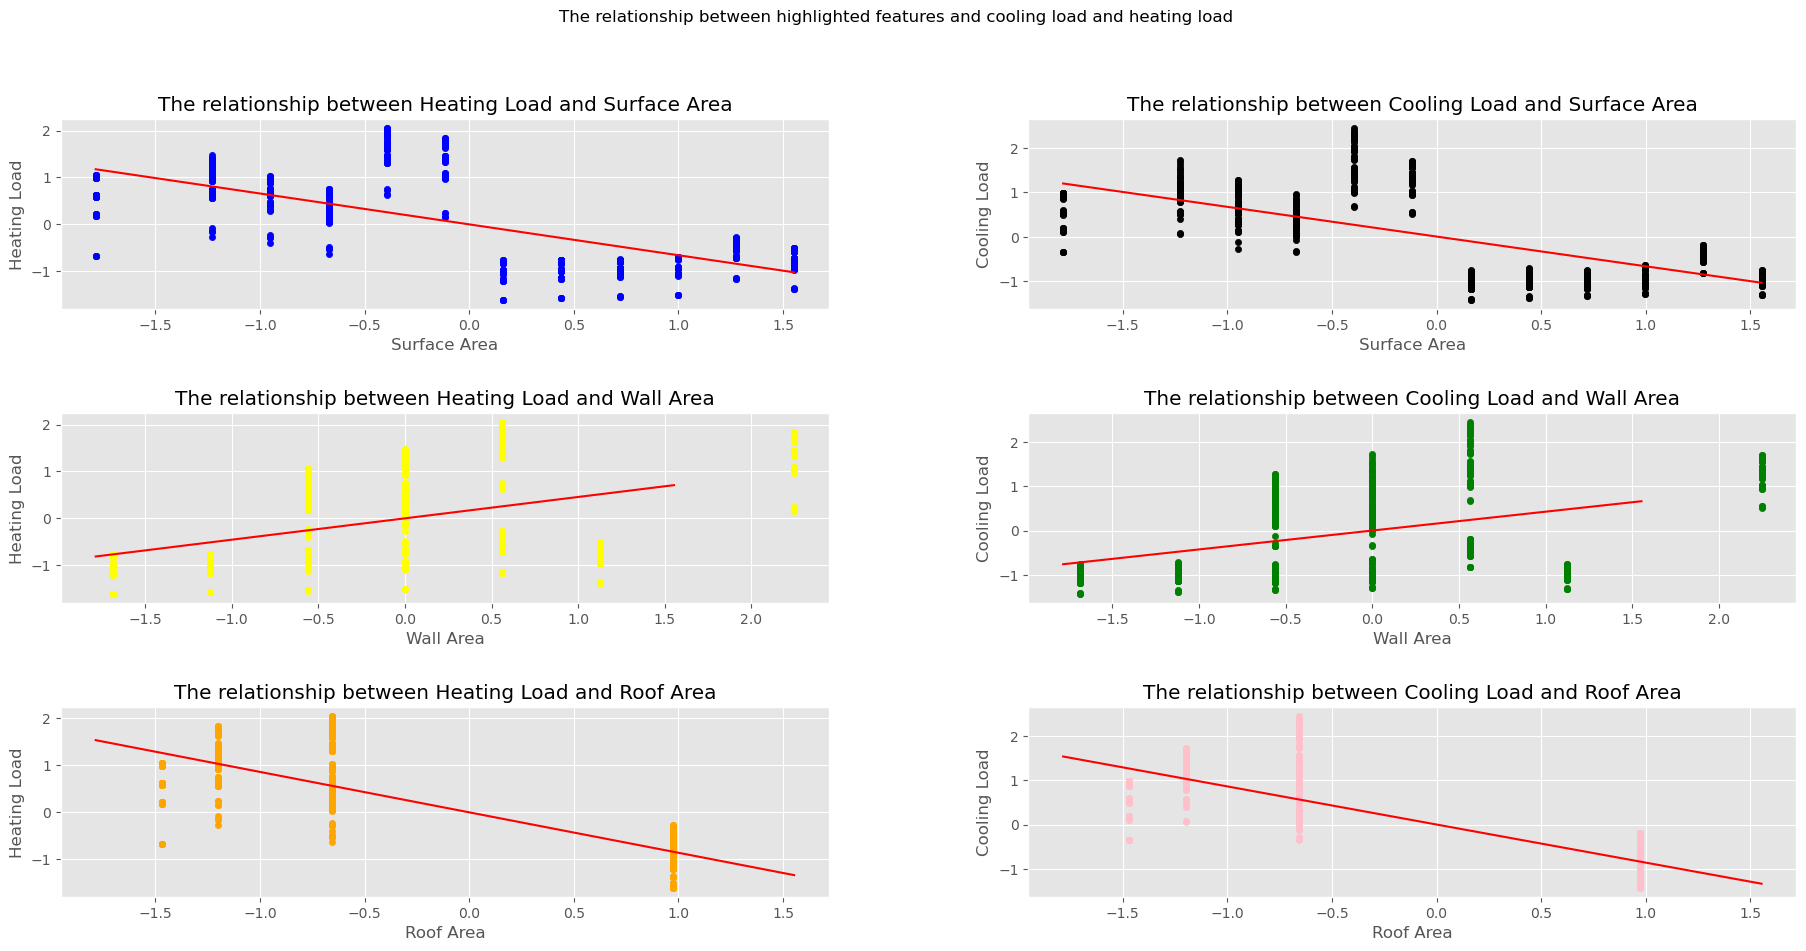

In [17]:
#Our plots 

fig = plt.figure()
fig.suptitle('The relationship between highlighted features and cooling load and heating load')

ax0 = fig.add_subplot(3,2,1)
ax1 = fig.add_subplot(3,2,2)
ax2 = fig.add_subplot(3,2,3)
ax3 = fig.add_subplot(3,2,4)
ax4 = fig.add_subplot(3,2,5)
ax5 = fig.add_subplot(3,2,6)

fig.tight_layout(pad =1.5)
# x2 
# plot 1
df.plot(kind = 'scatter', x = 'X2' , y = 'Y1', figsize = (20,10), color = 'blue', ax = ax0)
ax0.plot(X2, fit21[0]*X2 + fit21[1], color = 'red')
ax0.set_title('The relationship between Heating Load and Surface Area')
ax0.set_ylabel('Heating Load')
ax0.set_xlabel('Surface Area') 

# plot2 
df.plot(kind = 'scatter', x = 'X2' , y = 'Y2', figsize = (20,10), color = 'black', ax = ax1)
ax1.plot(X2, fit22[0]*X2 + fit22[1], color = 'red')
ax1.set_title('The relationship between Cooling Load and Surface Area')
ax1.set_ylabel('Cooling Load')
ax1.set_xlabel('Surface Area') 

# x3
# plot 1
df.plot(kind = 'scatter', x = 'X3' , y = 'Y1', figsize = (20,10), color = 'yellow', ax = ax2)
ax2.plot(X2, fit31[0]*X2 + fit31[1], color = 'red')
ax2.set_title('The relationship between Heating Load and Wall Area')
ax2.set_ylabel('Heating Load')
ax2.set_xlabel('Wall Area') 

# plot2 
df.plot(kind = 'scatter', x = 'X3' , y = 'Y2', figsize = (20,10), color = 'green', ax = ax3)
ax3.plot(X2, fit32[0]*X2 + fit32[1], color = 'red')
ax3.set_title('The relationship between Cooling Load and Wall Area')
ax3.set_ylabel('Cooling Load')
ax3.set_xlabel('Wall Area') 

# x4 
# plot 1
df.plot(kind = 'scatter', x = 'X4' , y = 'Y1', figsize = (20,10), color = 'orange', ax = ax4)
ax4.plot(X2, fit41[0]*X2 + fit41[1], color = 'red')
ax4.set_title('The relationship between Heating Load and Roof Area')
ax4.set_ylabel('Heating Load')
ax4.set_xlabel('Roof Area') 

# plot2 
df.plot(kind = 'scatter', x = 'X4' , y = 'Y2', figsize = (20,10), color = 'pink', ax = ax5)
ax5.plot(X2, fit42[0]*X2 + fit42[1], color = 'red')
ax5.set_title('The relationship between Cooling Load and Roof Area')
ax5.set_ylabel('Cooling Load')
ax5.set_xlabel('Roof Area') 

#### Explaining the data
We can see that there tends to be value concentration along lines in the features and for some values this has no impact on the cooling load and heating load. For the lack of variation in the features thats mostly due to the results of the simulations - in actuality we should find that there is variation on the values of the features.

#### Models

In [18]:
#Sci-kit learn inporting 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

In [19]:
Y1 = df[['Y1']]
Y2 = df[['Y2']]
X2 = df[['X2']]
X = df[['X1','X2','X3','X4','X5','X6']]

#### Model One: The Relationship between Surface Area and Energy Efficiency (Simple Linear Regression).



##### Model Devlopment

In [20]:
#Constructing our model - Heating Load = Y1 
lm21 = LinearRegression() #Y1
lm21 

LinearRegression()

In [21]:
#Splitting the data to training and testing  data 
x1_train, x1_test, y1_train, y1_test = train_test_split(X2, Y1,
                                                        test_size = 0.1,
                                                        random_state = 0)
lm21.fit(x1_train, y1_train)

print('Coefficent:',lm21.coef_)
print('Intercept:',lm21.intercept_)

Coefficent: [[-0.6565893]]
Intercept: [0.00598556]


In [22]:
y1_pred = lm21.predict(x1_test)

calc1 = np.mean(np.absolute(y1_pred - y1_test))
calc2 = np.mean((y1_pred - y1_test)**2)
calc3 = r2_score(y1_test ,y1_pred )

print('Mean Absolute Error:', calc1)
print('Mean Squared Error:', calc2)
print('r2_score:', calc3)

Mean Absolute Error: 0.6780825520413826
Mean Squared Error: 0.7289981488185335
r2_score: 0.37691900392285504


In [23]:
#Constructing our model - Heating Load = Y2
lm22 = LinearRegression() #Y2
lm22

LinearRegression()

In [24]:

x2_train, x2_test, y2_train, y2_test = train_test_split(X2, Y2,
                                                        test_size = 0.1,
                                                        random_state = 0)

lm22.fit(x2_train, y2_train)

print('Coefficent:', lm22.coef_)
print('Intercept:', lm22.intercept_)

Coefficent: [[-0.67024549]]
Intercept: [0.00765209]


In [25]:
y2_pred = lm22.predict(x2_test)

calc1 = np.mean(np.absolute(y2_pred - y2_test))
calc2 = np.mean((y2_pred - y2_test)**2)
calc3 = r2_score(y2_test ,y2_pred )

print('Mean Absolute Error:', calc1)
print('Mean Squared Error:', calc2)
print('r2_score:', calc3)

Mean Absolute Error: 0.615525146820025
Mean Squared Error: 0.6083379261438595
r2_score: 0.4386695289470356


##### Notes
Both Target models have reasonably High MAE and High MSE and reasonably close to average R2 score meaning that this model can explain some of the variation around the mean but not all of it. This infers that adding other features to the model can improve it.

##### Model Evalation 

In [26]:
# Cooling Load 
R2 = cross_val_score(lm21 , X2 , Y1, cv = 10) 
print(R2)
print('The mean of the folds (r^2 Score):', R2.mean())
print('The standard deviation of the folds (r^2 Score):', R2.std())

[-0.09276198  0.37743758  0.37713888  0.50071802  0.45186425  0.40416523
  0.61145572  0.33438984  0.357963    0.40857801]
The mean of the folds (r^2 Score): 0.3730948552437254
The standard deviation of the folds (r^2 Score): 0.17329670304663733


In [27]:
yhat = cross_val_predict(lm21, X2, Y1, cv = 10)
yhat[0:5]

array([[1.27946705],
       [1.27946705],
       [1.27946705],
       [1.27946705],
       [0.89967653]])

In [28]:
# Heating load 
R2 = cross_val_score(lm22 , X2 , Y2, cv = 10) 
print(R2)
print('The mean of the folds (r^2 Score):', R2.mean())
print('The standard deviation of the folds (r^2 Score):', R2.std())

[0.15316676 0.3971956  0.37849669 0.48214685 0.46173659 0.41106411
 0.60925493 0.37161631 0.43028061 0.45869005]
The mean of the folds (r^2 Score): 0.41536484974132754
The standard deviation of the folds (r^2 Score): 0.10893701866770569


In [29]:
yhat = cross_val_predict(lm22, X2, Y2, cv = 10)
yhat[0:5]

array([[1.27608092],
       [1.27608092],
       [1.27608092],
       [1.27608092],
       [0.89087405]])

##### Notes
The score from cross validation follows the evaluation of our r2 score from looking at one split. The R2 score is not strong enough across the board for us to establish that the feature influences the target by alot. Other features must be added to improve the model.

#### Model Two: The Relationship between All Features and Energy Efficiency (Multiple Linear Regression).

##### Model Development 

In [30]:
# Heating Load 
lm1 = LinearRegression()
lm1

LinearRegression()

In [31]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X, Y1,
                                                    test_size = 0.1,
                                                    random_state = 0) 

lm1.fit(x1_train, y1_train)

print('Coefficent:', lm1.coef_)
print('Intercept:', lm1.intercept_)

Coefficent: [[-0.68764606 -0.38603889  0.06891096 -0.40972246  0.70301133  0.00312206]]
Intercept: [-0.00114276]


In [32]:
y1_pred = lm1.predict(x1_test)

calc1 = np.mean(np.absolute(y1_pred - y1_test))
calc2 = np.mean((y1_pred - y1_test)**2)
calc3 = r2_score(y1_test ,y1_pred )

print('Mean Absolute Error:', calc1)
print('Mean Squared Error:', calc2)
print('r2_score:', calc3)

Mean Absolute Error: 0.3549089825030607
Mean Squared Error: 0.22469967233682886
r2_score: 0.8079472548939345


In [33]:
# Cooling Load 
lm2 = LinearRegression()
lm2

LinearRegression()

In [34]:
x2_train, x2_test, y2_train, y2_test = train_test_split(X, Y2,
                                                    test_size = 0.1,
                                                    random_state = 0) 

lm2.fit(x2_train, y2_train)

print('Coefficent:', lm2.coef_)
print('Intercept:', lm2.intercept_)

Coefficent: [[-0.79929927 -0.42000134  0.00214768 -0.41059672  0.7912934   0.02081418]]
Intercept: [0.00120572]


In [35]:
y2_pred = lm2.predict(x2_test)

calc1 = np.mean(np.absolute(y2_pred - y2_test))
calc2 = np.mean((y2_pred - y2_test)**2)
calc3 = r2_score(y2_test ,y2_pred )

print('Mean Absolute Error:', calc1)
print('Mean Squared Error:', calc2)
print('r2_score:', calc3)

Mean Absolute Error: 0.2900407304408712
Mean Squared Error: 0.16791982696285734
r2_score: 0.8450556647590919


##### Notes 
Both Target models have reasonably low MAE and MSE and high R2 score meaning that this model can explain the majority of the variation. We can use Ridge Regrssion to improve the model

##### Model Evaluation

In [36]:
# Heating Load 
R2 = cross_val_score(lm1 , X , Y1, cv = 10) 
print(R2)
print('The mean of the folds (r^2 Score):', R2.mean())
print('The standard deviation of the folds (r^2 Score):', R2.std())

[0.29593253 0.8627128  0.85693965 0.87128716 0.93869204 0.90226172
 0.90277267 0.8177681  0.7699134  0.86817295]
The mean of the folds (r^2 Score): 0.8086453026020239
The standard deviation of the folds (r^2 Score): 0.17655512043328947


In [37]:
yhat = cross_val_predict(lm1, X, Y2, cv = 10)
yhat[:5]

array([[0.58601177],
       [0.59812193],
       [0.61023209],
       [0.62234224],
       [0.83359768]])

In [38]:
# Cooling Load 
R2 = cross_val_score(lm2 , X , Y2, cv = 10) 
print(R2)
print('The mean of the folds (r^2 Score):', R2.mean())
print('The standard deviation of the folds (r^2 Score):', R2.std())

[0.59221451 0.84308326 0.82611783 0.83832503 0.90744707 0.86900876
 0.87848607 0.81903922 0.7915211  0.87671281]
The mean of the folds (r^2 Score): 0.824195566398948
The standard deviation of the folds (r^2 Score): 0.08373413539894808


In [39]:
yhat = cross_val_predict(lm2, X, Y2, cv = 10)
yhat[:5]

array([[0.58601177],
       [0.59812193],
       [0.61023209],
       [0.62234224],
       [0.83359768]])

##### Notes
The score from cross validation follows the evaluation of our r2 score from looking at one split. The R2 score is quite strong enough across the board for us to establish that the features combined does influence the target by alot. We can use ridge regression to improve the model.

##### Model 2.1 Using ridge regression to improve the model.

In [40]:
#New Model with ridge construct 
parameters = {'alpha': [0.1 ,1,10,100,1000,10000]}

In [41]:
# Creating Model - Heating Load 
R1 = Ridge()
R1

Ridge()

In [42]:
Rr1 = GridSearchCV(R1, parameters, scoring='neg_mean_squared_error',cv=10)
Rr1.fit(X, Y1)
print(Rr1.best_estimator_)

Ridge(alpha=1)


In [43]:
best1 = Rr1.best_estimator_
best1.fit(X,Y1)

Ridge(alpha=1)

In [44]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X, Y1,
                                                    test_size = 0.1,
                                                    random_state = 0) 

best1.fit(x1_train, y1_train)

print('Coefficent:', best1.coef_)
print('Intercept:', best1.intercept_)

Coefficent: [[-0.57417768 -0.31016916  0.08828165 -0.34509419  0.73077755  0.00322846]]
Intercept: [-0.00118921]


In [45]:
y1_pred = best1.predict(x1_test)

calc1 = np.mean(np.absolute(y1_pred - y1_test))
calc2 = np.mean((y1_pred - y1_test)**2)
calc3 = r2_score(y1_test ,y1_pred )

print('Mean Absolute Error:', calc1)
print('Mean Squared Error:', calc2)
print('r2_score:', calc3)

Mean Absolute Error: 0.3540079004269107
Mean Squared Error: 0.22490503957970562
r2_score: 0.8077717257427828


In [46]:
# Creating Model - Cooling Load
R2 = Ridge()
R2

Ridge()

In [47]:
Rr2 = GridSearchCV(R2, parameters, scoring='neg_mean_squared_error',cv=10)
Rr2.fit(X,Y2)
print(Rr2.best_estimator_)

Ridge(alpha=0.1)


In [48]:
best2 = Rr2.best_estimator_
best2.fit(X,Y2)

Ridge(alpha=0.1)

In [49]:
x2_train, x2_test, y2_train, y2_test = train_test_split(X, Y2,
                                                    test_size = 0.1,
                                                    random_state = 0) 

best2.fit(x2_train, y2_train)

print('Coefficent:', best2.coef_)
print('Intercept:', best2.intercept_)

Coefficent: [[-0.78331394 -0.40913027  0.00480479 -0.4012792   0.79562327  0.02082799]]
Intercept: [0.00119941]


In [50]:
y2_pred = best2.predict(x2_test)

calc1 = np.mean(np.absolute(y2_pred - y2_test))
calc2 = np.mean((y2_pred - y2_test)**2)
calc3 = r2_score(y2_test ,y2_pred )

print('Mean Absolute Error:', calc1)
print('Mean Squared Error:', calc2)
print('r2_score:', calc3)

Mean Absolute Error: 0.2898798985408013
Mean Squared Error: 0.16787985991609017
r2_score: 0.8450925434743983


##### Notes
We see via using gridSearchCV that using alpha = 1 will give the best result. Upon looking at the results we see that it makes no diffrence to the MAE, MSE and R2 hence adding a penalty will not make the model any better.